In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


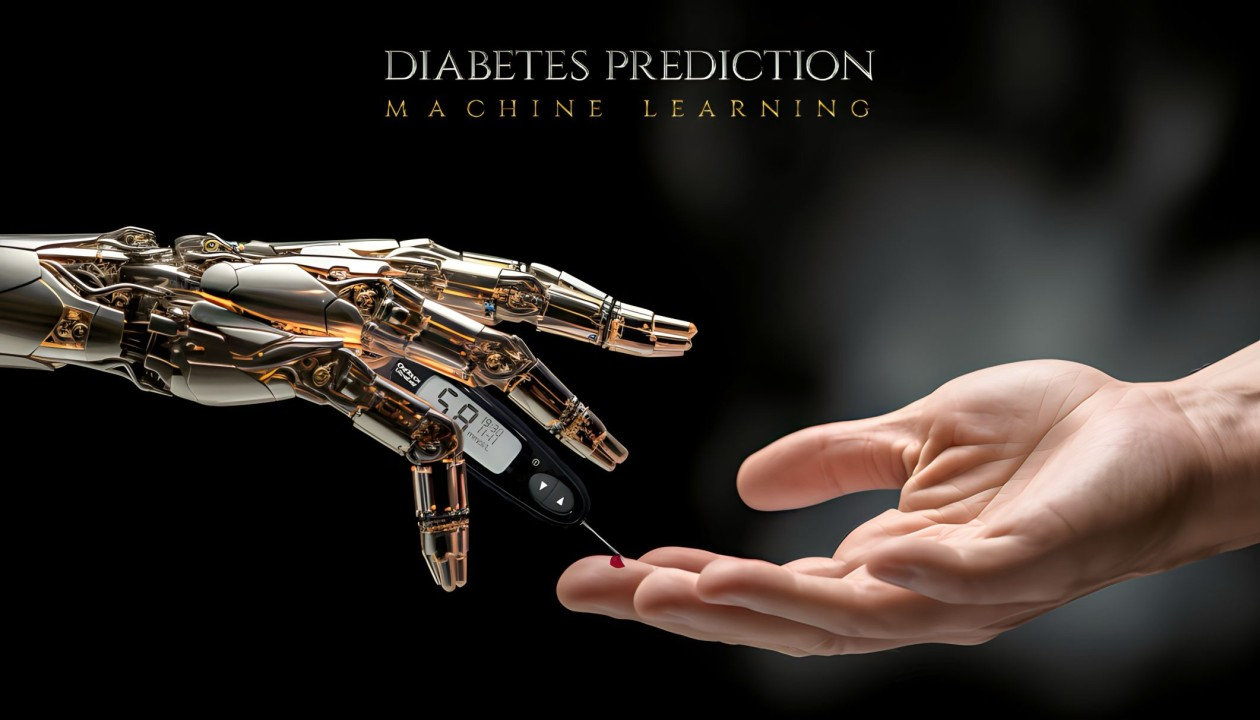

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report,accuracy_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/diabetes.csv')

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [ ]:
df.shape

(768, 9)

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: >

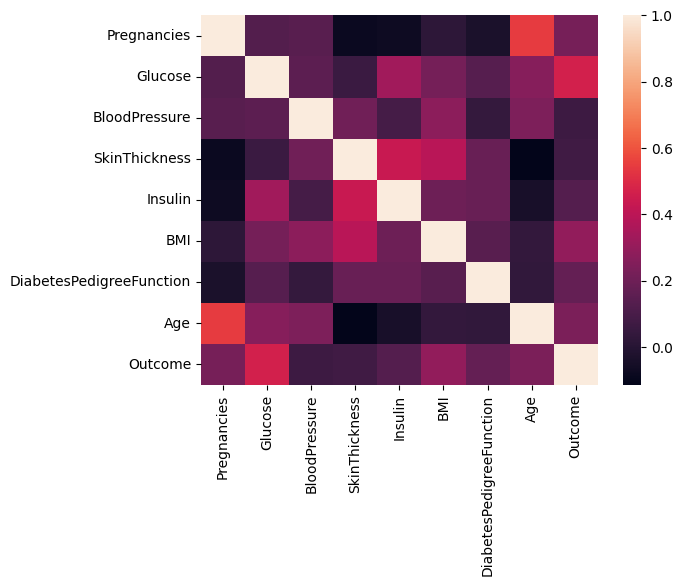

In [ ]:
sns.heatmap((df).corr())

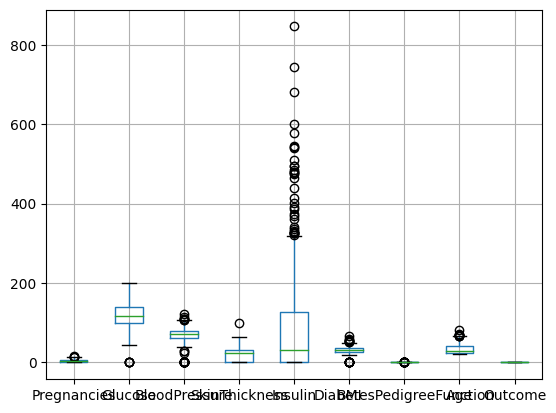

In [ ]:
df.boxplot()
plt.show()

In [ ]:
for column in df.columns:
    if df[column].dtype in ['int64', 'float64']:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        min_range= Q1 - 1.5 * IQR
        max_range= Q3 + 1.5 * IQR
        df=df[(df[column]>=min_range)&(df[column]<=max_range)]

In [ ]:
df['Outcome'].value_counts()

Outcome
0    439
1    197
Name: count, dtype: int64

0 --> Non-Diabetic

1 --> Diabetic

In [ ]:
x = df.drop(columns = 'Outcome')
y = df['Outcome']

In [ ]:
over=RandomOverSampler()
x,y=over.fit_resample(x,y)

In [ ]:
y.value_counts()

Outcome
1    439
0    439
Name: count, dtype: int64

In [ ]:
print(x)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              5      116             74              0        0  25.6   
..           ...      ...            ...            ...      ...   ...   
873           13      104             72              0        0  31.2   
874            0      180             90             26       90  36.5   
875            1      144             82             46      180  46.1   
876            3      187             70             22      200  36.4   
877            3      170             64             37      225  34.5   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [ ]:
print(y)

0      1
1      0
2      1
3      0
4      0
      ..
873    1
874    1
875    1
876    1
877    1
Name: Outcome, Length: 878, dtype: int64


Train Test Split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state=2)

In [ ]:
ss=StandardScaler()
x_train_scaled=ss.fit_transform(x_train)
x_test_scaled=ss.fit_transform(x_test)

Training the Model

In [ ]:
sv=SVC()
kn=KNeighborsClassifier()
LR=LogisticRegression()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
ada=AdaBoostClassifier()
xgb=XGBClassifier()
gb=GradientBoostingClassifier()
models=[sv,kn,LR,dt,rf,ada,xgb,gb]
evaluation={'name':[],'accuracy':[]}
for model in models:
  model.fit(x_train_scaled,y_train)
  y_pred=model.predict(x_test_scaled)
  accuracy=accuracy_score(y_test,y_pred)
  evaluation['name'].append(model)
  evaluation['accuracy'].append(accuracy)
  print(model)
  print(classification_report(y_test,y_pred))
  print('_______________________________________________________')

SVC()
              precision    recall  f1-score   support

           0       0.79      0.72      0.75       132
           1       0.74      0.81      0.78       132

    accuracy                           0.77       264
   macro avg       0.77      0.77      0.76       264
weighted avg       0.77      0.77      0.76       264

_______________________________________________________
KNeighborsClassifier()
              precision    recall  f1-score   support

           0       0.76      0.66      0.71       132
           1       0.70      0.80      0.74       132

    accuracy                           0.73       264
   macro avg       0.73      0.73      0.73       264
weighted avg       0.73      0.73      0.73       264

_______________________________________________________
LogisticRegression()
              precision    recall  f1-score   support

           0       0.72      0.74      0.73       132
           1       0.73      0.70      0.72       132

    accuracy        

In [ ]:
rs=RandomizedSearchCV(RandomForestClassifier(),{'n_estimators':[1,2,5,10],'criterion':['gini','entropy','log_loss'],'max_depth':[1,5,10]})

In [ ]:
x_scaled=ss.transform(x)
rs.fit(x_scaled,y)
rs.best_params_

{'n_estimators': 5, 'max_depth': 10, 'criterion': 'entropy'}

In [ ]:
rs.best_score_

0.8303766233766232

In [ ]:
rf=RandomForestClassifier(n_estimators=10,max_depth=10,criterion='gini')
rf.fit(x_train_scaled,y_train)
rd_y_pred=rf.predict(x_test_scaled)

In [ ]:
print(accuracy_score(y_test,rd_y_pred))

0.7765151515151515


Saving the trained model

In [ ]:
import pickle
needed_files = {'model': rs, 'scaler': ss}
filename = 'diabetes_model_scaler.sav'
with open(filename, 'wb') as file:
    pickle.dump(needed_files, file)

In [ ]:
for column in x.columns:
  print(column)

Pregnancies
Glucose
BloodPressure
SkinThickness
Insulin
BMI
DiabetesPedigreeFunction
Age
